In [1]:
import sys
from pathlib import Path
src_utils_path = Path("../../src/utils")
sys.path.append(str(src_utils_path))
import metrics as mjo
import yaml  

import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

import numpy as np
import xarray as xr 

In [2]:
lat_range = 20
lead = 35
memory_last = 0

In [3]:
with open('./best_config.yaml', 'r') as file:
    config = yaml.safe_load(file)

output_path = config['prediction_save_path']

In [4]:
fn_list = []

import re

for exp_num in range(1, 5):
    fn = re.sub(r"exp\d+/", f"exp{exp_num}/", output_path)
    fn_list.append(fn)

bcc, rmse = mjo.get_skill_all_leads_parallel(
    'ROMI',
    fn_list=fn_list,
    rule='Iamp>1.0',
    month_list=None,
    datesta='2016-01-01',
    dateend='2021-12-31',
    lead_max=lead,
    exp_list=np.arange(1, 5),
    Fnmjo=config["data"]["target_path"]
)

bccv, rmsev = mjo.get_skill_all_leads_parallel(
    'ROMI',
    fn_list=fn_list,
    rule='Iamp>1.0',
    month_list=None,
    datesta='2010-01-01',
    dateend='2015-12-31',
    lead_max=lead,
    exp_list=np.arange(1, 5),
    Fnmjo=config["data"]["target_path"]
)

In [5]:
bccs = []
bccvs = []
for exp_num in range(1, 5):
    bccs.append(bcc[exp_num])
    bccvs.append(bccv[exp_num])

bccs = np.array(bccs)
bccvs = np.array(bccvs)


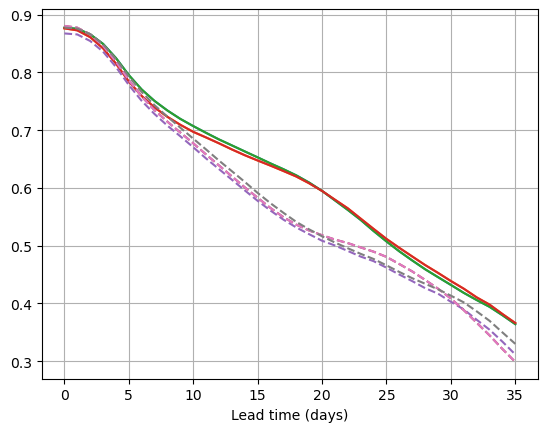

In [6]:
plt.plot(np.arange(lead+1), bccs.T, linestyle='-')
plt.plot(np.arange(lead+1), bccvs.T, linestyle='--')

plt.xlabel('Lead time (days)')
plt.grid()